# 01. Import Libraries

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 02. Import Data Sets

In [5]:
# Create a path to make it easier to import files
path = r'/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/World Happiness Report'

In [6]:
# Import data set
df = pd.read_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'df_clean.pkl'))

In [7]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption,Happiness Category
0,Finland,Western Europe,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,High Happiness
1,Norway,Western Europe,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,High Happiness
2,Denmark,Western Europe,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,High Happiness
3,Iceland,Western Europe,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,High Happiness
4,Switzerland,Western Europe,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,High Happiness


In [8]:
# Configure API key

quandl.ApiConfig.api_key = "mxfJFc2HmPd3HyqkBPLM"

In [9]:
# Federeal Reserve Economic Data - Civilian Unemployment Rate
data = quandl.get ('FRED/UNRATE')

In [10]:
data.shape

(889, 1)

In [11]:
data.head()

,Value
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [12]:
data.columns

Index(['Value'], dtype='object')

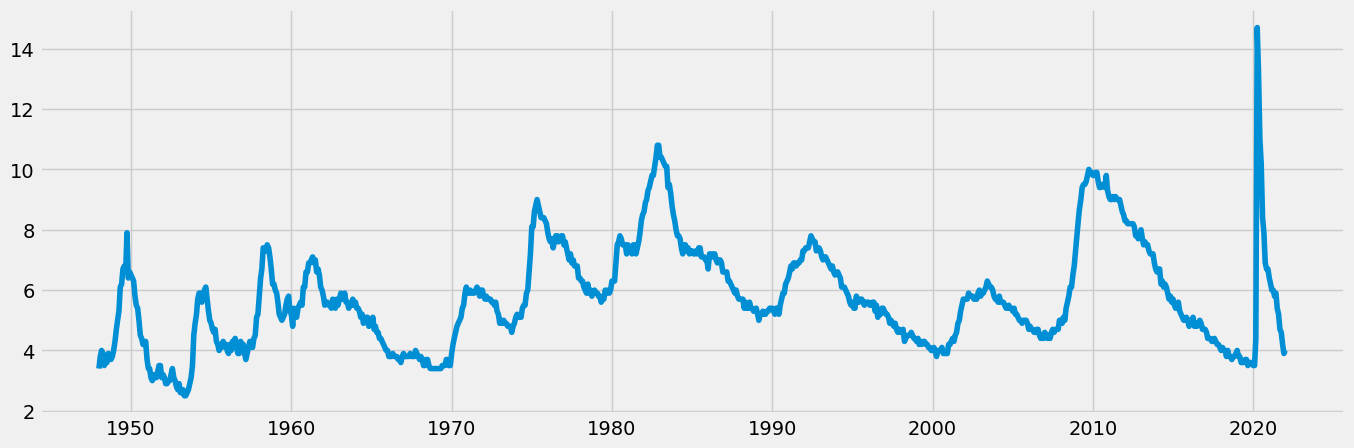

In [17]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### When looking at the plot, it is noticeable how individual events can create a fluctuation over time and can have a sustained impact on the unemployment rate. What stands out in particular is the COVID-19 pandemic, during which the unemployment rate experienced a very pronounced peak but also recovered relatively quickly.

# 03. Create Subset 

In [18]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [19]:
# Create a new subset using the loc function and your “Date” column

data_sub = data_2.loc[(data_2['Date'] >= '2018-01-01') & (data_2['Date'] < '2023-12-31')]

In [20]:
# Set the "Date" column as the index
# It has to be noted that the data of the FRED data set only ranges to 2022

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2018-01-01,4.0
2018-02-01,4.1
2018-03-01,4.0
2018-04-01,4.0
2018-05-01,3.8


# 04. Plot the Subset

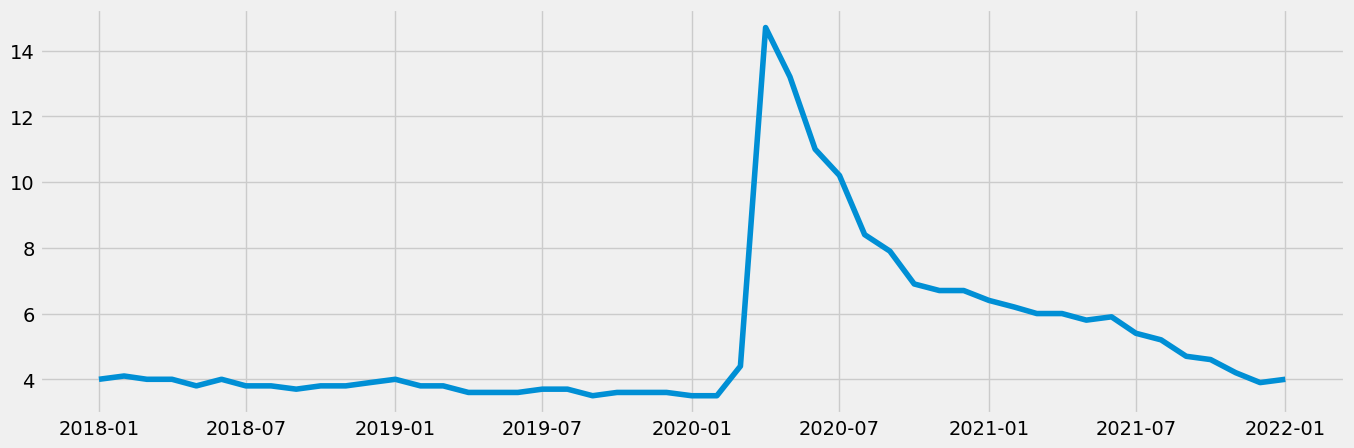

In [21]:
# Create line chart of new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

# 05. Decompose the data’s components

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts

rcParams['figure.figsize'] = 20, 10

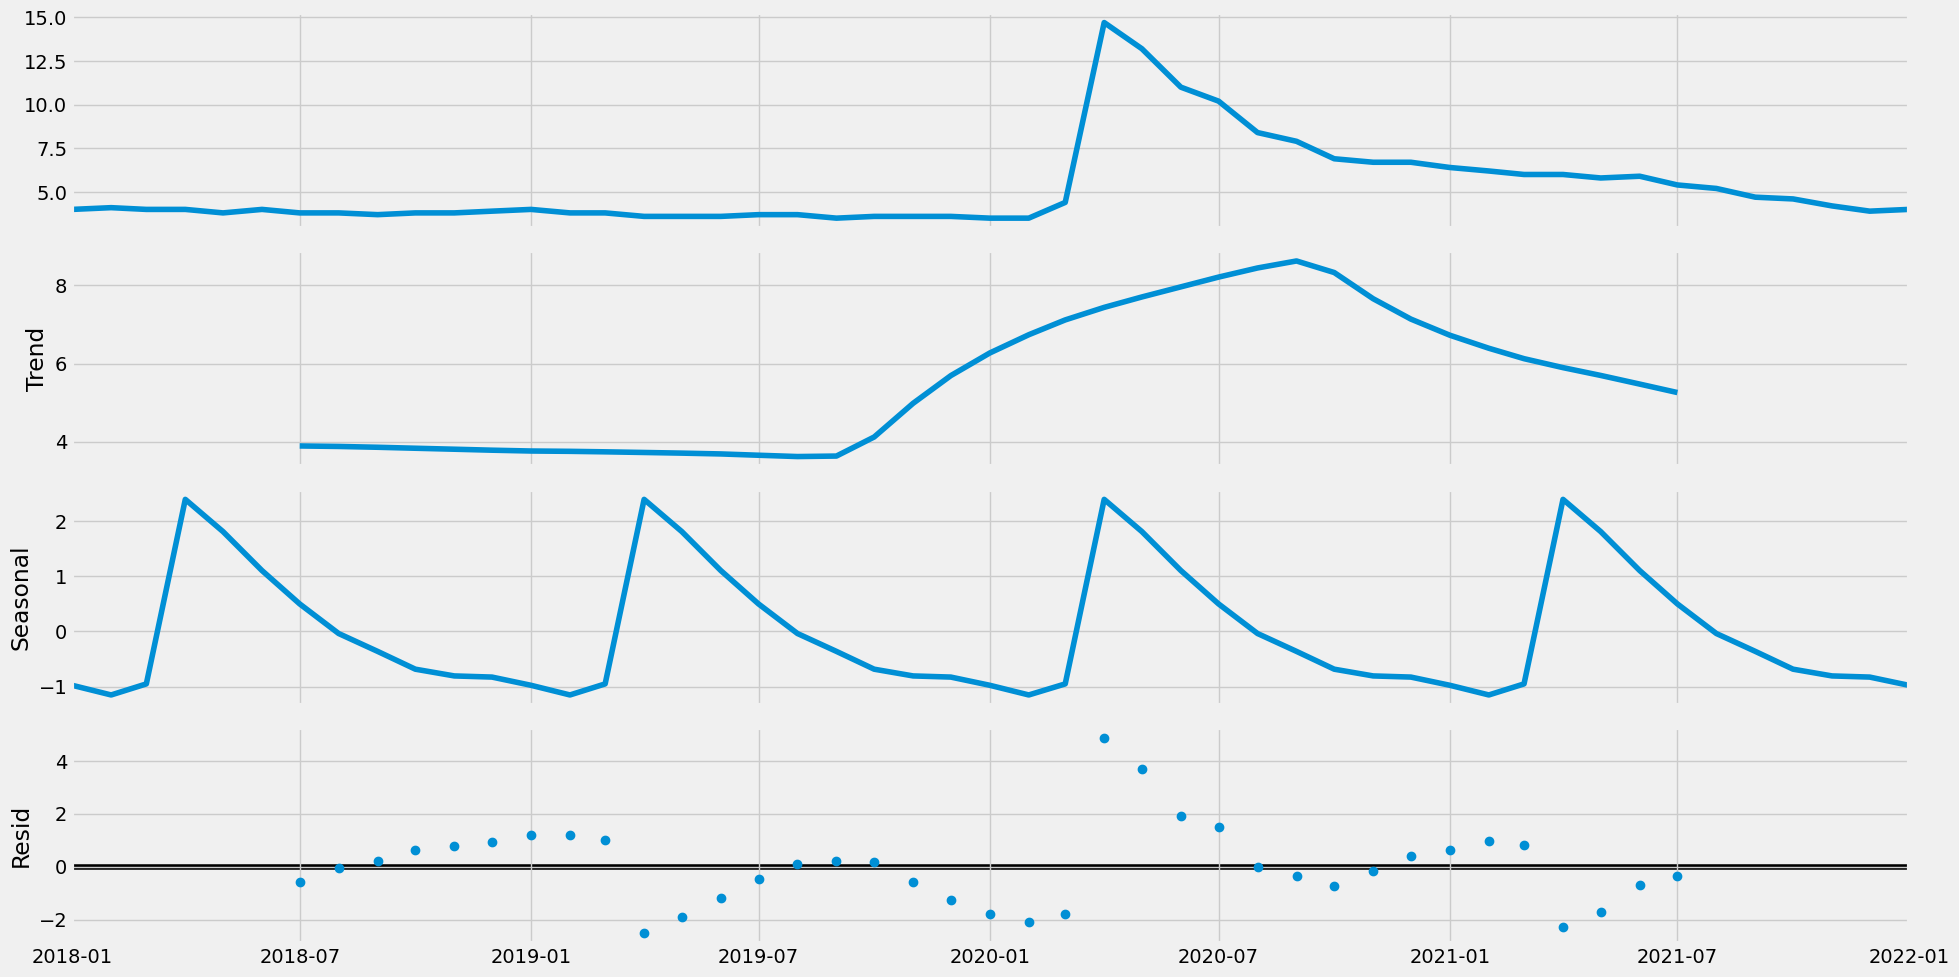

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

### Seasonal spikes are occurring four times, which suggest a pattern that repeats at regular intervals during the specified timeline. The range of residuals (-2 to 4), which are quite large for this data set, indicate that the variability may be attributed to other factors that are not captured by the trend and seasonality components. The actual unemployment rate significantly deviates from what is expected based on the trend, especially for the Covid-19 period. This particular event would then explain why the actual values deviate so significantly from the expected values, especially around this time period.

# 06. Conduct a Dickey-Fuller test

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. I need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub)

Dickey-Fuller Stationarity test:
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensi

### The more negative the T-Statistic , the stronger the evidence against the null hypothesis. The Statistic is negative, but it is still greater than the critical value ate 1% level.The  p-value is also relatively high indicating a weak evidence against the Null Hypothesis. The Null Hypothesis can't be rejected. The data may no be stationary.

# 07. Conduct Round of Differencing 

In [35]:
# Conduct a round of differencing
data_diff = data_sub - data_sub.shift(1)

In [36]:
# Remove the missing values from the results of differencing
data_diff.dropna(inplace = True)

In [37]:
data_diff.head()

,Value
datetime,
2018-02-01,0.1
2018-03-01,-0.1
2018-04-01,0.0
2018-05-01,-0.2
2018-06-01,0.2


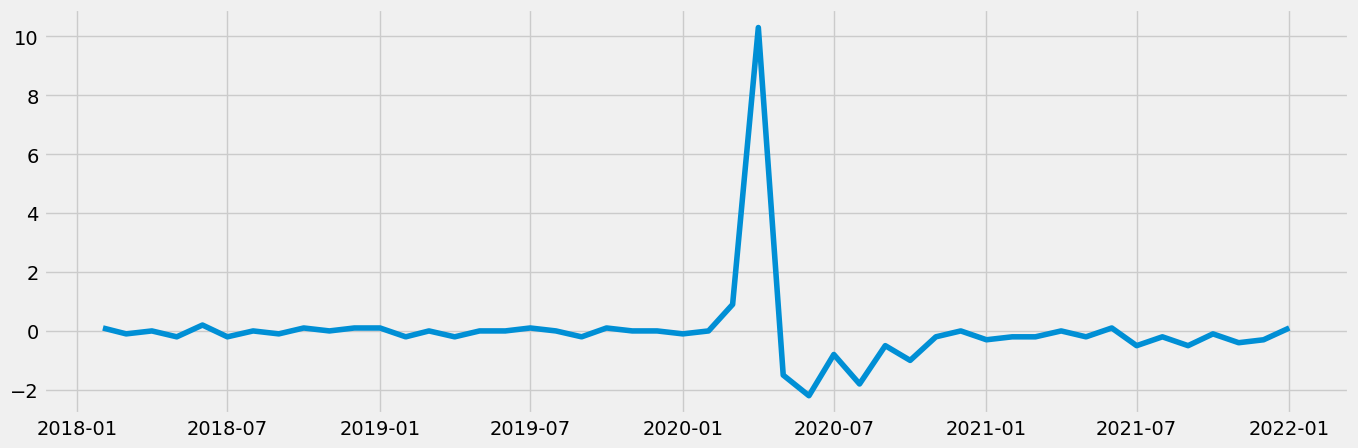

In [38]:
# Create line chart of new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
# Run the Dickey-Fuller test again checking 
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensi

### The Test Statistic is now more negative than the Critical Value at 1% and the p-value is significantly smaller than commonly used significance level of 0.05. The Null Hypothesis can be rejected. The time series is stationary.

# 08. Check the data’s autocorrelations

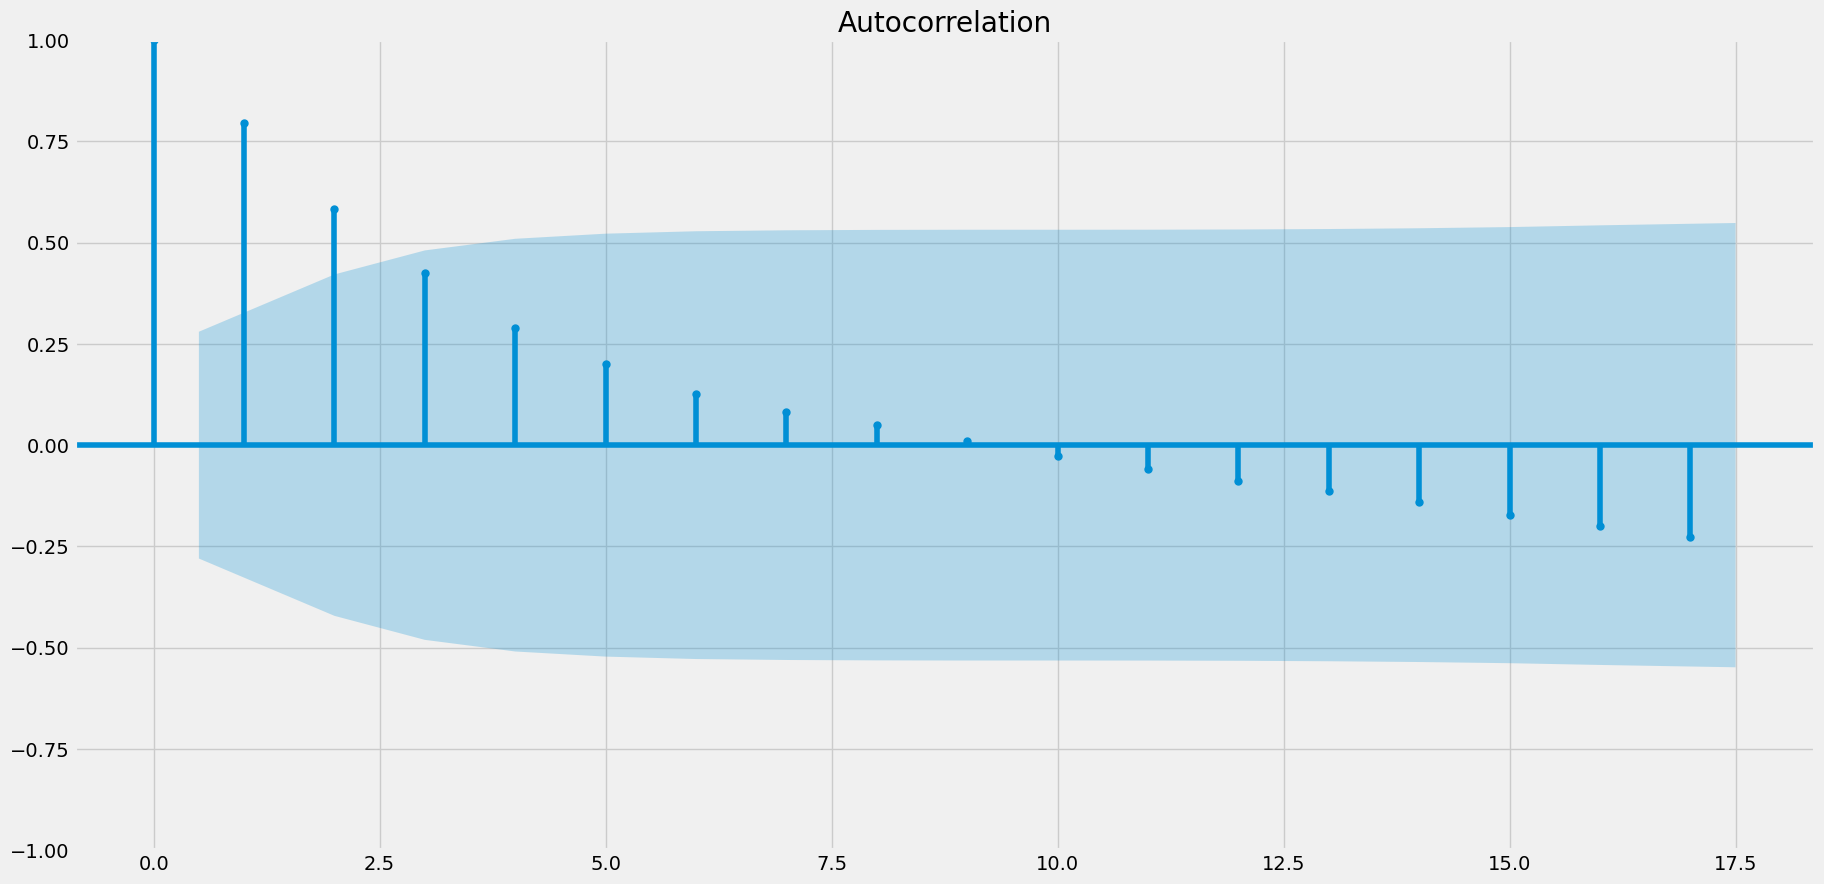

In [40]:
# Check the autocorrelations for the subset 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()

### The verticals going outside of the confidence interval (outside of the blue range) do represent lags that are significantly correlated with each other.This infers that the data is non-stationary.

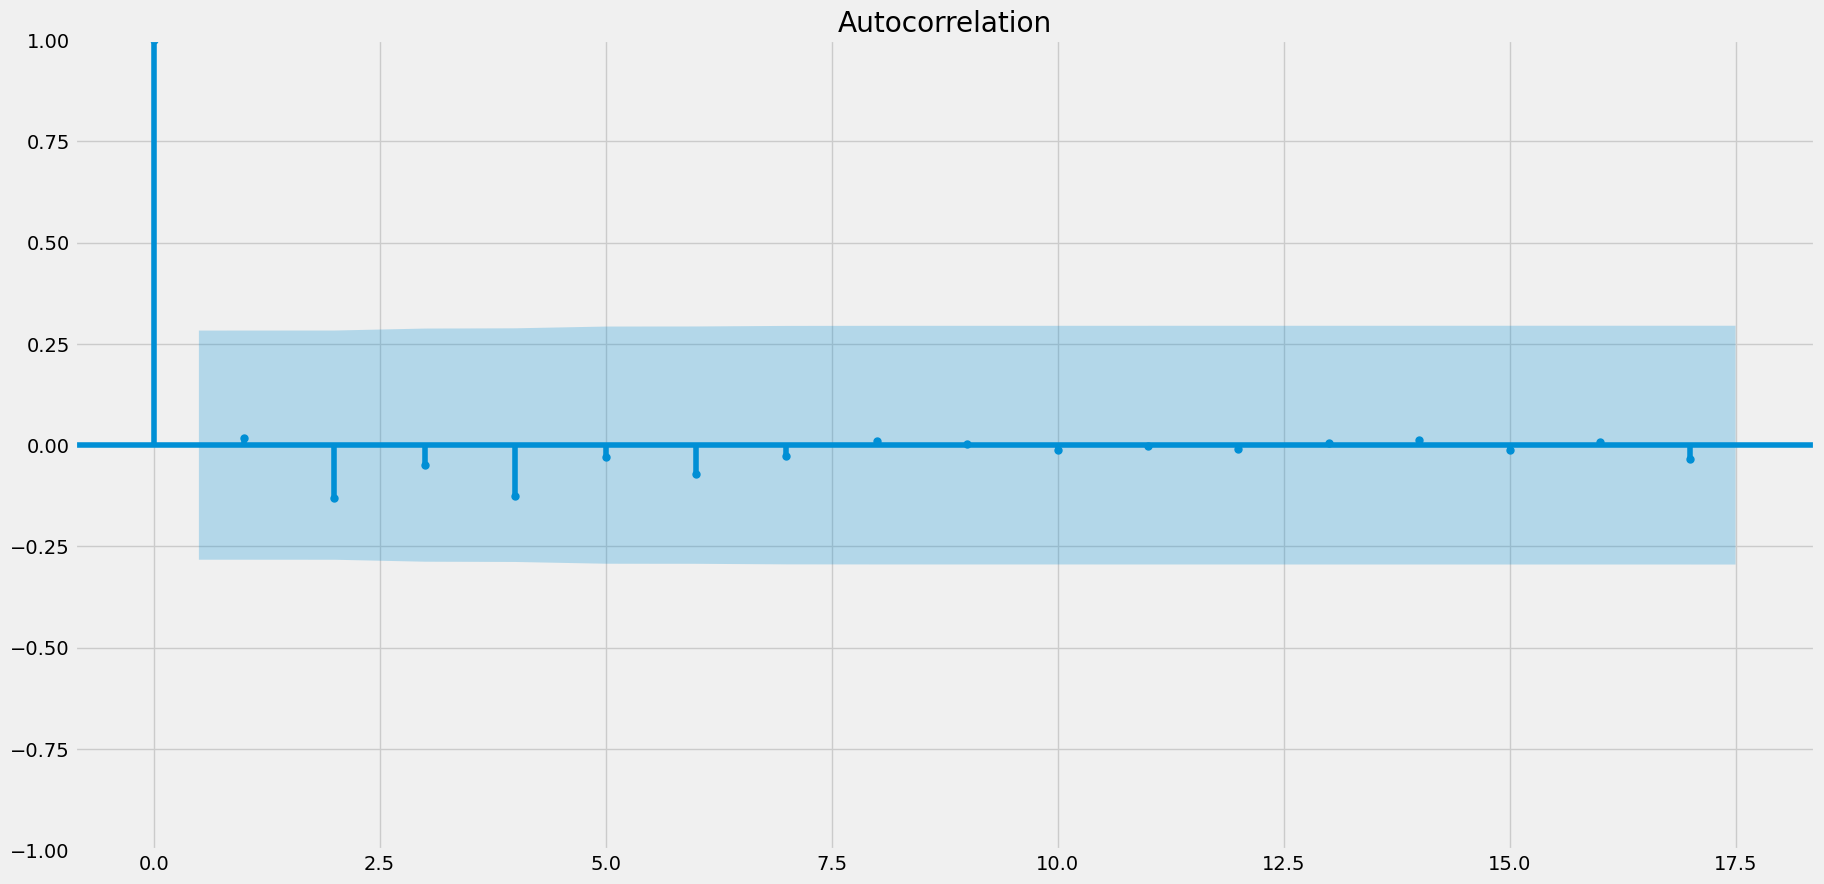

In [41]:
# Check the autocorrelations for the subset after differencing 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_diff)
plt.show()

### The overwhelming majority of the verticals is now well inside the confidence intervals. At the same time there is still one very big vertical, most likely representative of the  unexpected deviation of the actual data from the predicted during the Covid 19 pandemic. This signifies the timer series being generally stationary, with also having a big outlier event.